## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database);

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

You will need to have tensorflow installed. It is recommended that you use pip to install this library. 

```bash
pip install tensorflow
pip install tensorflow_datasets
```

> 🧠
>  You can control the verbosity of TensorFlow logs by setting the `TF_CPP_MIN_LOG_LEVEL` environment variable.
> ```python
> # import os
> # os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # set to 0 to see all logs, 4 to see only errors
> ```

In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

epoch_num = 1


In [22]:
import tensorflow as tf
from tensorflow import keras  # see https://www.tensorflow.org/install
import tensorflow_datasets as tfds # see https://www.tensorflow.org/datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

tf.__version__

'2.16.1'

In [23]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
print(len(X_train), X_train.shape)
print(len(y_train), y_train.shape)
print(len(X_test), X_test.shape)
print(len(y_test), y_test.shape)

60000 (60000, 28, 28)
60000 (60000,)
10000 (10000, 28, 28)
10000 (10000,)


In [25]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [26]:
np. set_printoptions(linewidth=120) # increase output display width (so it's easier to read the 28x28 arrays below)

print(X_train[0]) # display the data for the first image in our training set
print(f'\nThe label for this image is {y_train[0]:d}') # display the label for the first image in our training set1
print("Input shape is", X_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

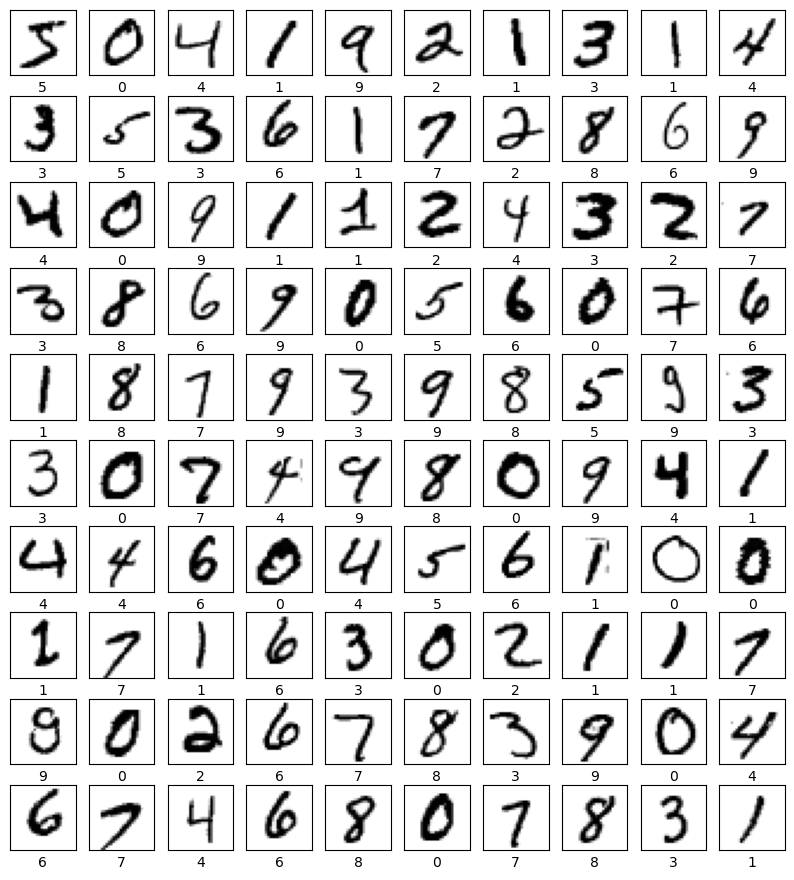

In [27]:
plt.figure(figsize=(10,11)) # make the figure a little taller than wide - to accommodate the labels
i = 0
#for image, label in mnist_train.take(5):
for i, image in enumerate(X_train[0:100]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Deep Network

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
%%time
# create model structure
deep_model = keras.models.Sequential()
deep_model.add(keras.layers.Flatten())
#deep_model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))

#deep_model.add(keras.layers.Input(shape=(28, 28)))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(64, activation='relu'))
deep_model.add(keras.layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 
deep_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

CPU times: user 80 ms, sys: 3.68 ms, total: 83.7 ms
Wall time: 31.7 ms


In [30]:
%%time

# fit the model
history = deep_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epoch_num, batch_size=100
)

# 
deep_model.summary()

600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6885 - loss: 1.9898 - val_accuracy: 0.9156 - val_loss: 0.3000


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (100, 784)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (100, 64)              │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (100, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (100, 10)              │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,592 (791.38 KB)

 Trainable params: 67,530 (263.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 135,062 (527.59 KB)

CPU times: user 10.1 s, sys: 4.02 s, total: 14.1 s
Wall time: 9.26 s


In [31]:
%%time

# evaluate the model

val_loss, val_accuracy = deep_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.2997
Validation accuracy: 0.9156
CPU times: user 965 ms, sys: 524 ms, total: 1.49 s
Wall time: 1.65 s


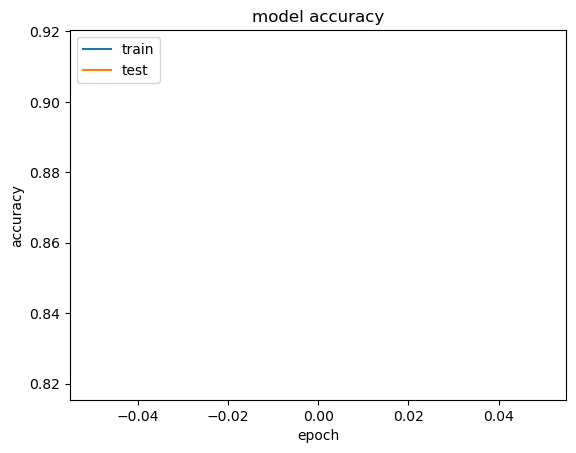

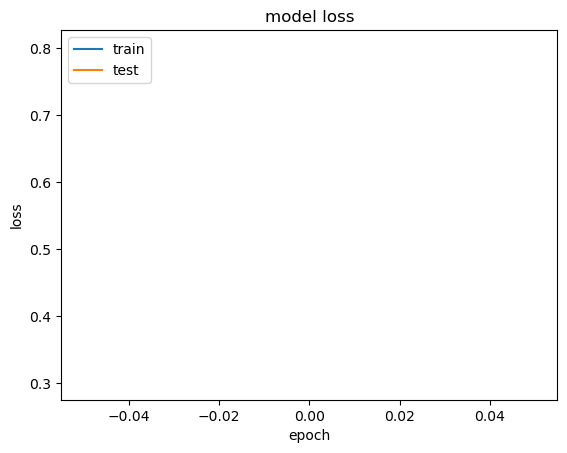

In [32]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


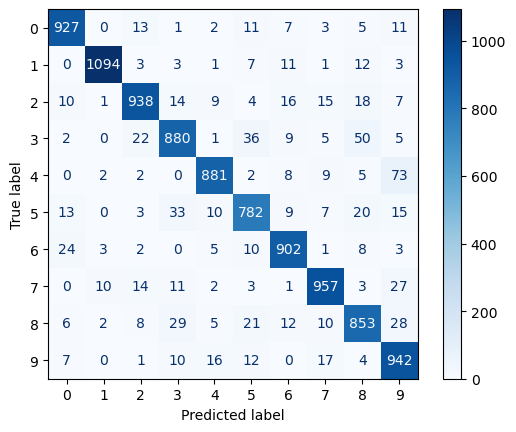

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = deep_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Wide Network

In [34]:
%%time

input_shape = (28,28,1) # 28x28 pixel images with 1 color channel (grayscale)

from keras.models import Model
from keras.layers import Flatten, Input, Dense, concatenate
from keras.utils import plot_model
#Define the model: for multi-class

inputs = Input(shape=(28,28))
flatten = Flatten()(inputs)
layer1 = Dense(512, activation='relu')(flatten)
outputs = Dense(10, activation="softmax")(layer1)
wide_model = Model(inputs=inputs, outputs=outputs)

wide_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

wide_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 125 ms, sys: 7.31 ms, total: 133 ms
Wall time: 44.3 ms


In [35]:
%%time

# Fit the model

history = wide_model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=epoch_num, batch_size=100)

600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8536 - loss: 10.7040 - val_accuracy: 0.9417 - val_loss: 0.8223
CPU times: user 5.01 s, sys: 2.29 s, total: 7.3 s
Wall time: 4.76 s


In [36]:
%%time

# evaluate the model
val_loss, val_accuracy = wide_model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 0.8210
Validation accuracy: 0.9417
CPU times: user 853 ms, sys: 528 ms, total: 1.38 s
Wall time: 1.52 s


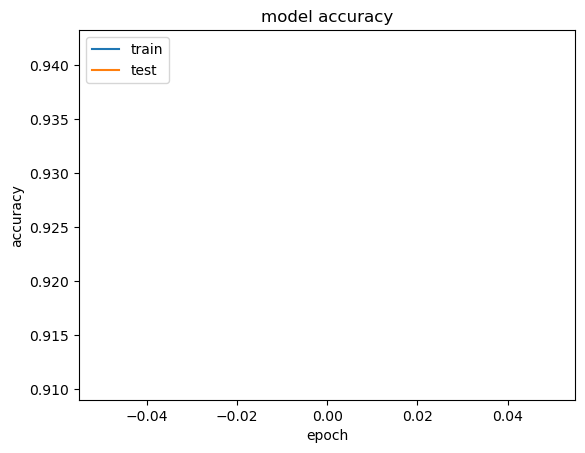

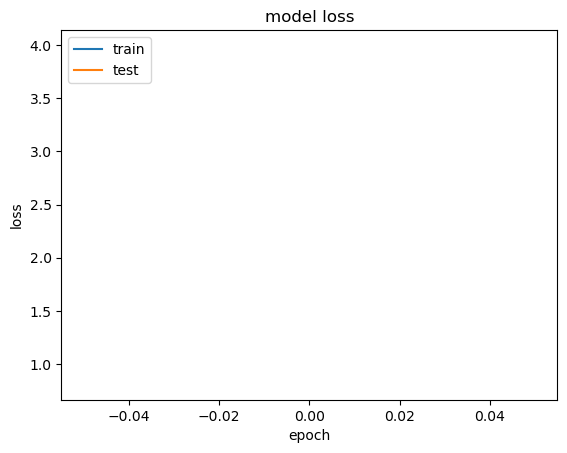

In [37]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


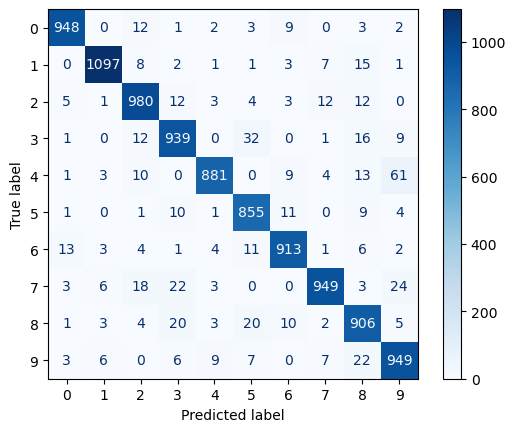

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = wide_model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Wide and Deep Network

In [39]:
X_train_flattened = X_train.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)


In [40]:
%%time

#Define the model: for multi-class

from keras.models import Model
from keras.layers import Input, Dense, concatenate, Normalization
from keras.utils import plot_model


CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 13.1 µs


In [41]:
normalization_layer = tf.keras.layers.Normalization()
deep_layer1 = tf.keras.layers.Dense(50, activation="relu")
deep_layer2 = tf.keras.layers.Dense(50, activation="relu")
deep_layer3 = tf.keras.layers.Dense(50, activation="relu")
deep_layer3 = tf.keras.layers.Dense(50, activation="relu")
wide_layer1 = tf.keras.layers.Dense(200, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(10, activation="softmax")
#
input_ = tf.keras.layers.Input(shape=(28*28,))
normalized = normalization_layer(input_)
deep1 = deep_layer1(normalized)
deep2 = deep_layer2(deep1)
deep3 = deep_layer3(deep2)
wide1 = wide_layer1(normalized)
concat = concat_layer([deep3, wide1])
output = output_layer(concat)
#
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [42]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])


In [43]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 784)       │      1,569 │ input_layer_4[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 50)        │     39,250 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 50)        │      2,550 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 50)        │      2,550 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 200)       │    157,000 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 250)       │          0 │ dense_19[0][0],   │
│ (Concatenate)       │                   │            │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 10)        │      2,510 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,429 (802.46 KB)

 Trainable params: 203,860 (796.33 KB)

 Non-trainable params: 1,569 (6.13 KB)

In [44]:
history = model.fit(X_train_flattened, y_train, 
                    validation_data=(X_test_flattened, y_test), 
                    epochs=epoch_num, batch_size=100)

600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8406 - loss: 9.3418 - val_accuracy: 0.9236 - val_loss: 1.0274


In [45]:
history.history['accuracy']

[0.8972499966621399]

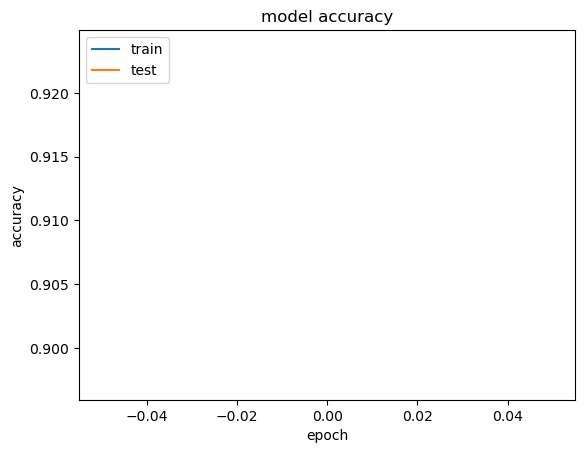

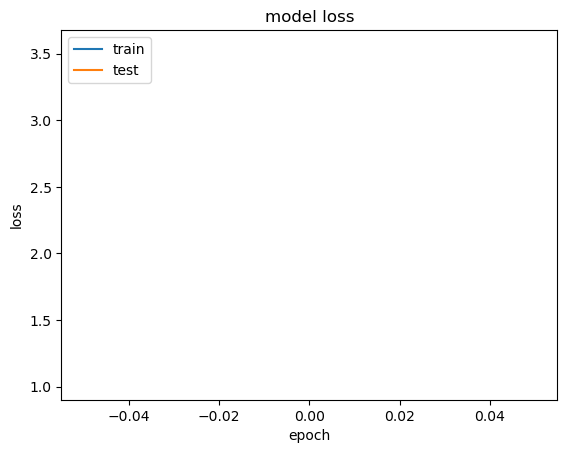

In [46]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
%%time

# evaluate the model
val_loss, val_accuracy = model.evaluate(X_test_flattened, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 1.0271
Validation accuracy: 0.9236
CPU times: user 1.44 s, sys: 535 ms, total: 1.98 s
Wall time: 1.78 s


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


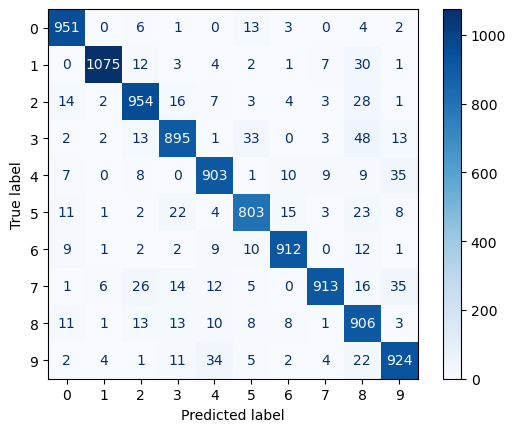

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# display the confusion matrix
y_pred = model.predict(X_test_flattened).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()